Text(0, 0.5, 'Square root of epsilon')

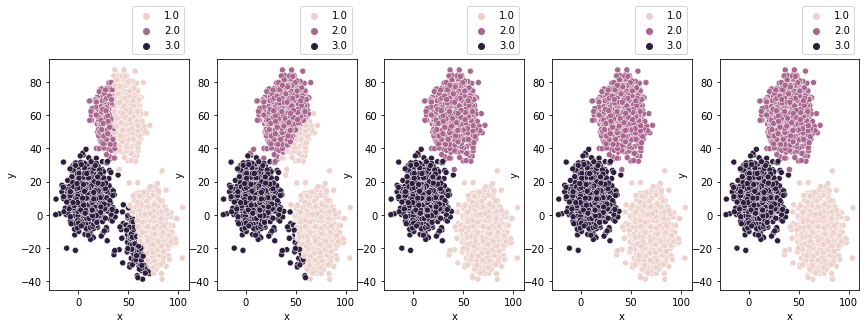

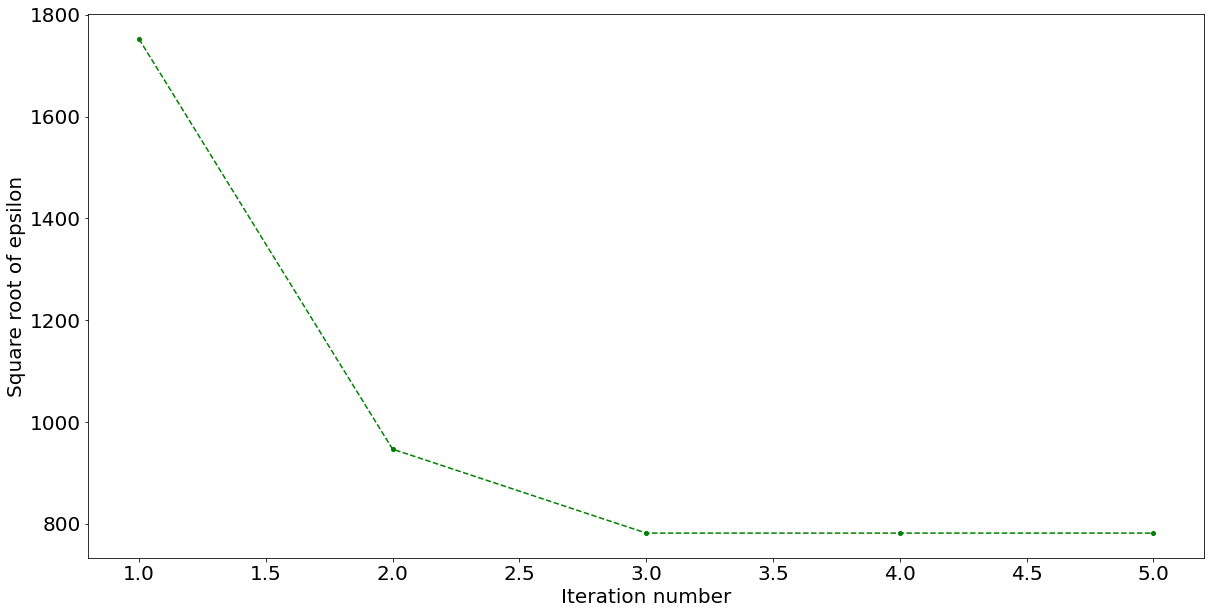

In [1]:
#https://medium.com/analytics-vidhya/k-means-clustering-using-python-from-scratch-7ccdace7789
#https://github.com/Joelfranklin96/K-Means-Clustering
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#cluster = pd.read_csv('k-means clustering.csv') # Reading data file into 'cluster'.
cluster = pd.read_csv('Clustering_Data.csv') # Reading data file into 'cluster'.

k = 3 # Number of clusters
rows = cluster.shape[0] # 'rows' contains the total number of rows in cluster data.
cols = cluster.shape[1] # 'cols' contains the total number of columns in cluster data.

centroids = cluster.loc[np.random.randint(1,rows+1,k)] # Randomly initialises 'k' no. of centroids.
centroids['new'] = list(range(1,k+1)) 
centroids.set_index('new',inplace = True) # New indices 1 to k are set for the dataframe 'centroids'.
d = np.random.rand(rows) # Initialization of d which would contain the centroid number closest to data point.

number_of_iterations = 5
epsilon = list(range(number_of_iterations)) # 'epsilon' is the sum of squares of distances between points and centroid of a cluster for each iteration

for i in range(0,number_of_iterations): # This 'for' loop is for iterations.

    for j in range(0,rows): # This 'for' loop finds the centroid number closest to the data point.
        d[j] = ((centroids - cluster.loc[j])**2).sum(axis = 1).idxmin()
    cluster['centroid number'] = d # A new column 'centroid number' is added to dataframe 'cluster'.

    plt.subplots_adjust(bottom=0.1, right=2, top=0.9) # Adjusts the subplot.
    plt.subplot(1,number_of_iterations,i+1)
    sns.scatterplot(x = 'x',y = 'y',data = cluster,hue = 'centroid number',legend = 'full') # Scatter plot is plotted with differentiating factor as 'centroid number'
    plt.legend(bbox_to_anchor=(1, 1), loc=4, borderaxespad=0.5) #Adjusts the legend box.
    
    mean_x = list(range(k)) # Initialisation of 'mean_x' which will store mean of 'x' values of each cluster.
    mean_y = list(range(k)) # Initialisation of 'mean_y' which will store mean of 'y' values of each cluster.
    for m in range(0,k): # This 'for' loop calculates mean of 'x' and 'y' values of each cluster.
        mean_x[m] = cluster[cluster['centroid number'] == (m+1)]['x'].mean()
        mean_y[m] = cluster[cluster['centroid number'] == (m+1)]['y'].mean()
    centroids.replace(list(centroids['x']),mean_x,inplace = True) # The 'centroids' are replaced with the new values.
    centroids.replace(list(centroids['y']),mean_y,inplace = True)
    
    z = list(range(k)) # Initialisation of z  and centroid of each cluster.
    for p in range(0,k): # This 'for' loop calculates square of distances between data points and centroid of each cluster.
        z[p] = ((cluster[cluster['centroid number'] == p+1][['x','y']] - centroids.iloc[p])**2).values.sum()
    epsilon[i] = sum(z) # 'epsilon' is sum of squares of distances between points and centroid of a cluster for each iteration

# Plotting graph of 'Iteration number' vs 'Square root of Epsilon'
a = list(range(1,6))
plt.figure(figsize=(20,10)) # Size of figure is adjusted.
plt.xticks(fontsize=20) # Size of number labels on x-axis is adjusted.
plt.yticks(fontsize=20) # Size of number labels on y-axis is adjusted.
plt.plot(a, [x**0.5 for x in epsilon], 'go--', linewidth=1.5, markersize=4)
plt.xlabel('Iteration number',fontsize=20) 
plt.ylabel('Square root of epsilon',fontsize=20) 


In [2]:
#https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540
# Now let us fit the model with a range of values of ‘k’ starting from 2 to 5
# each value of ‘k’ the algorithm runs for 15 iterations 

import numpy as np # Import the necessary packages.
import pandas as pd 

epsilon = list(range(4)) # Initialisation of epsilon which would store cost function for each value of 'k' after final iteration.

for k in range(2,6): # Number of clusters
    
    cluster = pd.read_csv('Clustering_Data.csv') # Read data file into 'cluster'
    
    rows = cluster.shape[0] # 'rows' contains the total number of rows in cluster data.
    cols = cluster.shape[1] # 'cols' contains the total number of columns in cluster data.
  
    centroids = cluster.loc[np.random.randint(1,rows+1,k)] # Randomly initialises 'k' no. of centroids.
    centroids['new'] = list(range(1,k+1)) # New indices 1 to k are set for the dataframe 'centroids'.
    centroids.set_index('new',inplace = True) 
    d = np.random.rand(rows) # Initialization of 'd' which would contain the centroid number closest to data point.

    number_of_iterations = 15
    temp_epsilon = list(range(number_of_iterations)) # 'temp_epsilon' is the sum of squares of distances between points and centroid of a cluster for each iteration.

    for i in range(0,number_of_iterations): # This 'for' loop is for iterations.

        for j in range(0,rows): # This 'for' loop finds the centroid number closest to the data point.
            d[j] = ((centroids - cluster.loc[j])**2).sum(axis = 1).idxmin()
        cluster['centroid number'] = d # A new column 'centroid number' is added to dataframe 'cluster'.

        mean_x = list(range(k)) # Initialisation of 'mean_x' which will store mean of 'x' values of each cluster.
        mean_y = list(range(k)) # Initialisation of 'mean_y' which will store mean of 'y' values of each cluster.
        for m in range(0,k): # This 'for' loop calculates mean of 'x' and 'y' values of each cluster.
            mean_x[m] = cluster[cluster['centroid number'] == (m+1)]['x'].mean()
            mean_y[m] = cluster[cluster['centroid number'] == (m+1)]['y'].mean()
        centroids.replace(list(centroids['x']),mean_x,inplace = True) # The 'centroids' are replaced with the new values.
        centroids.replace(list(centroids['y']),mean_y,inplace = True)
    
        z = list(range(k)) # Initialisation of z  and centroid of each cluster.
        for p in range(0,k): # This 'for' loop calculates square of distances between data points and centroid of each cluster.
            z[p] = ((cluster[cluster['centroid number'] == p+1][['x','y']] - centroids.iloc[p])**2).values.sum()
        temp_epsilon[i] = sum(z) 
        
        epsilon[k-2] = temp_epsilon[i] # The cost function after final iteration for each value of 'k' would be stored in epsilon.
    
    %reset_selective -f centroids # The dataframe 'centroids' is reset.

Text(0, 0.5, 'Value of Epsilon')

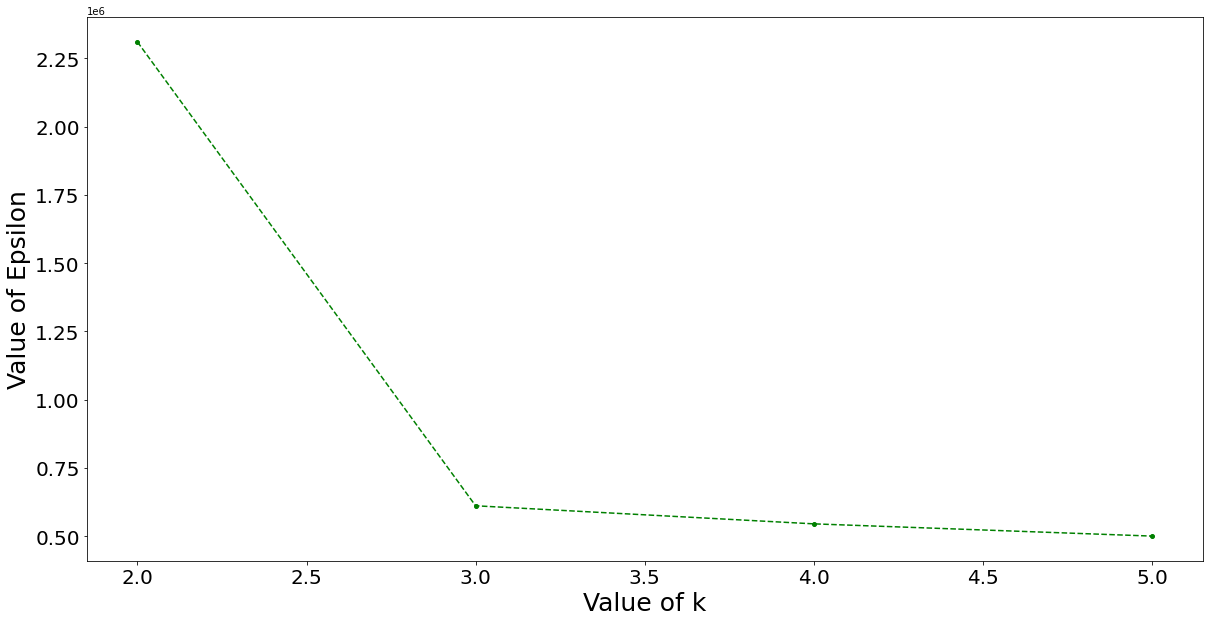

In [3]:
k = list(range(2,6)) # Range of 'k'
plt.figure(figsize=(20,10)) # Size of figure is adjusted.
plt.xticks(fontsize=20) # Size of number labels on x-axis is adjusted.
plt.yticks(fontsize=20) # Size of number labels on y-axis is adjusted.
plt.plot(k,epsilon,'go--', linewidth=1.5, markersize=4) # Graph is plotted.
plt.xlabel('Value of k',fontsize = 25) # x-axis is labelled.
plt.ylabel('Value of Epsilon',fontsize = 25) # y-axis is labelled.

In [ ]:
#the optimum value of k is 3